In [1]:
from matplotlib import pyplot as plt
from numpy import where
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.datasets import make_gaussian_quantiles
import pandas as pd
import numpy as np
import os
from tqdm import tqdm_notebook

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1 Aquisição dos dados

In [13]:
def create_dataset():
    X1, y1 = make_gaussian_quantiles(cov=3., n_samples=10000, n_features=2, n_classes=3, random_state=1)
    X1 = pd.DataFrame(X1,columns=['x','y'])
    y1 = pd.Series(y1)

    X2, y2 = make_gaussian_quantiles(mean=(4, 4), cov=1, n_samples=5000, n_features=2, n_classes=3, random_state=1)
    X2 = pd.DataFrame(X2,columns=['x','y'])
    y2 = pd.Series(y2)

    X = pd.DataFrame(np.concatenate((X1, X2)))
    y = pd.Series(np.concatenate((y1, - y2 + 1)))

    y_categorical = to_categorical(y)
    # divisão treino/teste
    X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.30, shuffle = True, random_state=42)
    return X_train, y_train, X_test, y_test

In [14]:
x_train, y_train, x_test, y_test = create_dataset()

In [15]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(10500, 2) (10500, 3) (4500, 2) (4500, 3)


# 2 Treinando e avaliando o modelo

In [16]:
def model_training(n_nodes, X_train, y_train):

    n_input, n_classes = X_train.shape[1], y_test.shape[1]
    
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    #print(model.summary())

    # Compilando e treinando o modelo    
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, verbose=0)
    return model, history

In [17]:
def model_evaluation(model,X_test, y_test):
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    return test_acc

# 3 Avaliando a capacidade do modelo

  0%|          | 0/40 [00:00<?, ?it/s]

nós=1: 0.438
nós=2: 0.543
nós=3: 0.632
nós=4: 0.683
nós=5: 0.653
nós=6: 0.804
nós=7: 0.807
nós=8: 0.760
nós=9: 0.777
nós=10: 0.825
nós=11: 0.925
nós=12: 0.885
nós=13: 0.925
nós=14: 0.901
nós=15: 0.942
nós=16: 0.942
nós=17: 0.907
nós=18: 0.937
nós=19: 0.934
nós=20: 0.890
nós=21: 0.943
nós=22: 0.944
nós=23: 0.936
nós=24: 0.945
nós=25: 0.921
nós=26: 0.932
nós=27: 0.958
nós=28: 0.940
nós=29: 0.938
nós=30: 0.946
nós=31: 0.964
nós=32: 0.952
nós=33: 0.946
nós=34: 0.949
nós=35: 0.954
nós=36: 0.958
nós=37: 0.963
nós=38: 0.951
nós=39: 0.953
nós=40: 0.923


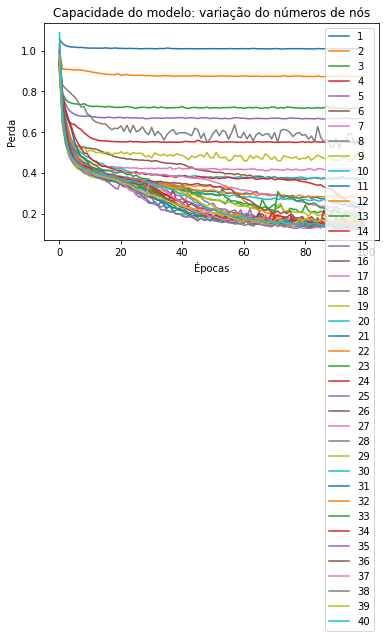

In [18]:
for n_nodes in tqdm_notebook(range(1,41)):
    
    model, history = model_training(n_nodes, x_train, y_train)
    test_acc = model_evaluation(model,x_test, y_test)
    print('nós=%d: %.3f' % (n_nodes, test_acc))
    plt.plot(history.history['loss'], label=str(n_nodes))

plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Capacidade do modelo: variação do números de nós')    
plt.legend()
plt.show()

In [20]:
def model_training(n_nodes, n_layers, X_train, y_train):

    n_input, n_classes = X_train.shape[1], y_test.shape[1]
    
    # definindo a arquitetura do modelo 
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    for _ in range(1, n_layers):
        model.add(Dense(n_nodes, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    
    # Compilando e treinando o modelo
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, verbose=0)
    return model, history

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

camadas=1; nós=1: 0.438
camadas=1; nós=2: 0.545
camadas=1; nós=3: 0.700
camadas=1; nós=4: 0.679
camadas=1; nós=5: 0.740
camadas=1; nós=6: 0.728
camadas=1; nós=7: 0.794
camadas=1; nós=8: 0.827
camadas=1; nós=9: 0.834
camadas=1; nós=10: 0.787
camadas=1; nós=11: 0.805
camadas=1; nós=12: 0.888
camadas=1; nós=13: 0.866
camadas=1; nós=14: 0.931
camadas=1; nós=15: 0.924
camadas=1; nós=16: 0.903
camadas=1; nós=17: 0.933
camadas=1; nós=18: 0.935
camadas=1; nós=19: 0.949
camadas=1; nós=20: 0.910
camadas=1; nós=21: 0.953
camadas=1; nós=22: 0.907
camadas=1; nós=23: 0.933
camadas=1; nós=24: 0.943
camadas=1; nós=25: 0.955
camadas=1; nós=26: 0.943
camadas=1; nós=27: 0.935
camadas=1; nós=28: 0.932
camadas=1; nós=29: 0.897
camadas=1; nós=30: 0.911
camadas=1; nós=31: 0.929


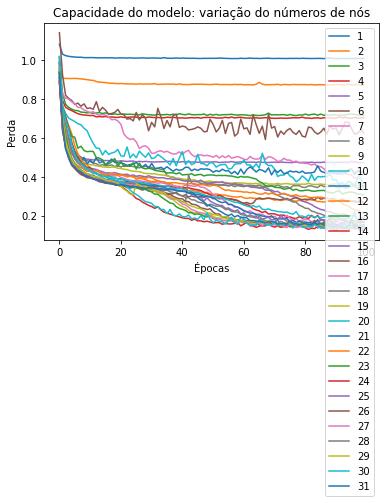

  0%|          | 0/31 [00:00<?, ?it/s]

camadas=2; nós=1: 0.327
camadas=2; nós=2: 0.575
camadas=2; nós=3: 0.696
camadas=2; nós=4: 0.713
camadas=2; nós=5: 0.820
camadas=2; nós=6: 0.894
camadas=2; nós=7: 0.910
camadas=2; nós=8: 0.902
camadas=2; nós=9: 0.921
camadas=2; nós=10: 0.958
camadas=2; nós=11: 0.951
camadas=2; nós=12: 0.936
camadas=2; nós=13: 0.950
camadas=2; nós=14: 0.923
camadas=2; nós=15: 0.943
camadas=2; nós=16: 0.945
camadas=2; nós=17: 0.954
camadas=2; nós=18: 0.918
camadas=2; nós=19: 0.946
camadas=2; nós=20: 0.956
camadas=2; nós=21: 0.951
camadas=2; nós=22: 0.964
camadas=2; nós=23: 0.947
camadas=2; nós=24: 0.956
camadas=2; nós=25: 0.952
camadas=2; nós=26: 0.952
camadas=2; nós=27: 0.956
camadas=2; nós=28: 0.928
camadas=2; nós=29: 0.956
camadas=2; nós=30: 0.949
camadas=2; nós=31: 0.944


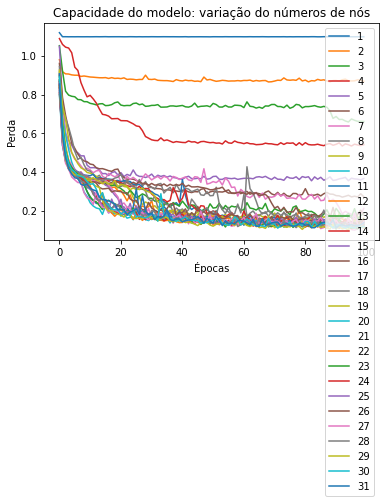

  0%|          | 0/31 [00:00<?, ?it/s]

camadas=3; nós=1: 0.429
camadas=3; nós=2: 0.438
camadas=3; nós=3: 0.782
camadas=3; nós=4: 0.847
camadas=3; nós=5: 0.828
camadas=3; nós=6: 0.912
camadas=3; nós=7: 0.850
camadas=3; nós=8: 0.940
camadas=3; nós=9: 0.928
camadas=3; nós=10: 0.940
camadas=3; nós=11: 0.964
camadas=3; nós=12: 0.931
camadas=3; nós=13: 0.942
camadas=3; nós=14: 0.879
camadas=3; nós=15: 0.929
camadas=3; nós=16: 0.926
camadas=3; nós=17: 0.953
camadas=3; nós=18: 0.968
camadas=3; nós=19: 0.948
camadas=3; nós=20: 0.960
camadas=3; nós=21: 0.954
camadas=3; nós=22: 0.964
camadas=3; nós=23: 0.952
camadas=3; nós=24: 0.944
camadas=3; nós=25: 0.948
camadas=3; nós=26: 0.953
camadas=3; nós=27: 0.942
camadas=3; nós=28: 0.936
camadas=3; nós=29: 0.950
camadas=3; nós=30: 0.958
camadas=3; nós=31: 0.963


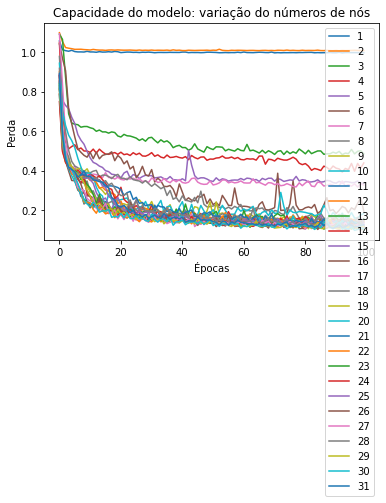

In [21]:
for n_layers in tqdm_notebook(range(1,4)):
    for n_nodes in tqdm_notebook(range(1,32)):
        
        model, history = model_training(n_nodes, n_layers, x_train, y_train)
        test_acc = model_evaluation(model,x_test, y_test)
    
        print('camadas=%d; nós=%d: %.3f' % (n_layers, n_nodes, test_acc))
        plt.plot(history.history['loss'], label=str(n_nodes))

    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.title('Capacidade do modelo: variação do números de nós')    
    plt.legend()
    plt.show()

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

camadas=1; nós=1: 0.327
camadas=1; nós=2: 0.544
camadas=1; nós=3: 0.660
camadas=1; nós=4: 0.721
camadas=1; nós=5: 0.714
camadas=1; nós=6: 0.798
camadas=1; nós=7: 0.835
camadas=1; nós=8: 0.763
camadas=1; nós=9: 0.765
camadas=1; nós=10: 0.785
camadas=1; nós=11: 0.884
camadas=1; nós=12: 0.826
camadas=1; nós=13: 0.862
camadas=1; nós=14: 0.931
camadas=1; nós=15: 0.923
camadas=1; nós=16: 0.878


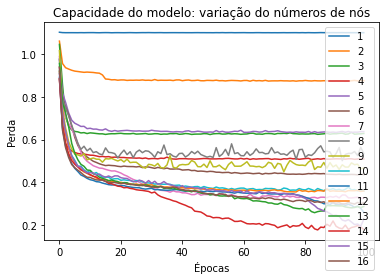

  0%|          | 0/16 [00:00<?, ?it/s]

camadas=2; nós=1: 0.436
camadas=2; nós=2: 0.432
camadas=2; nós=3: 0.724
camadas=2; nós=4: 0.747
camadas=2; nós=5: 0.816
camadas=2; nós=6: 0.945
camadas=2; nós=7: 0.898
camadas=2; nós=8: 0.948
camadas=2; nós=9: 0.838
camadas=2; nós=10: 0.920
camadas=2; nós=11: 0.909
camadas=2; nós=12: 0.955
camadas=2; nós=13: 0.962
camadas=2; nós=14: 0.950
camadas=2; nós=15: 0.956
camadas=2; nós=16: 0.947


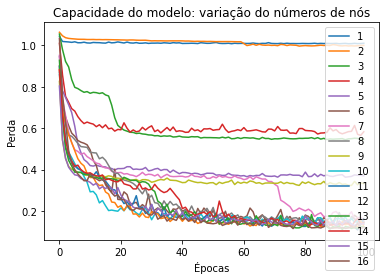

  0%|          | 0/16 [00:00<?, ?it/s]

camadas=3; nós=1: 0.327
camadas=3; nós=2: 0.326
camadas=3; nós=3: 0.798
camadas=3; nós=4: 0.792
camadas=3; nós=5: 0.821
camadas=3; nós=6: 0.872
camadas=3; nós=7: 0.858
camadas=3; nós=8: 0.915
camadas=3; nós=9: 0.948
camadas=3; nós=10: 0.956
camadas=3; nós=11: 0.930
camadas=3; nós=12: 0.954
camadas=3; nós=13: 0.909
camadas=3; nós=14: 0.943
camadas=3; nós=15: 0.909
camadas=3; nós=16: 0.951


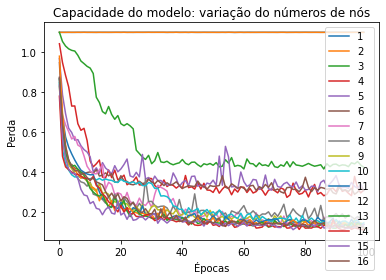

In [22]:
for n_layers in tqdm_notebook(range(1,5)):
    for n_nodes in tqdm_notebook(range(1,17)):
        
        model, history = model_training(n_nodes, n_layers, x_train, y_train)
        test_acc = model_evaluation(model,x_test, y_test)
    
        print('camadas=%d; nós=%d: %.3f' % (n_layers, n_nodes, test_acc))
        plt.plot(history.history['loss'], label=str(n_nodes))

    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.title('Capacidade do modelo: variação do números de nós')    
    plt.legend()
    plt.show()